# HomeWork 5

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Intro-to-ML


In [ ]:
import torch
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch import nn

In [ ]:
class HW5Problem1Model:
    def __init__(self, modelType="linear", lossFunction=None):
        self.modelType = modelType
        self.lossFunction = lossFunction if lossFunction else self.lossFunc

    def linearModel(self, tf, w, b):
        return w * tf + b

    def quadModel(self, tf, w1, w2, b):
        return w1 * tf**2 + w2 * tf + b

    @staticmethod
    def lossFunc(tp, tc):
        return torch.mean((tp - tc) ** 2)

    def model(self, tf, *params):
        if self.modelType == "linear":
            return self.linearModel(tf, *params)
        elif self.modelType == "quad":
            return self.quadModel(tf, *params)
        else:
            raise ValueError("Unsupported model type")

    def train(self, numEpochs, learningRate, params, tf, tc):
        optimizer = optim.Adam(params, lr=learningRate)
        for epoch in range(1, numEpochs + 1):
            optimizer.zero_grad()
            tp = self.model(tf, *params)
            loss = self.lossFunction(tp, tc)
            loss.backward()
            optimizer.step()

            if epoch % 500 == 0 or epoch == numEpochs:
                print(f'Epoch {epoch}, Loss {float(loss):.6f}')
        return params

    def plotComparison(self, tf, tc, linearParams, quadParams):
        with torch.no_grad():
            # Generate predictions for both models
            linearPredictions = self.linearModel(tf, *linearParams)
            quadPredictions = self.quadModel(tf, *quadParams)

        # Plotting the results
        plt.figure(figsize=(8, 6))
        plt.scatter(tf, tc, color="blue", label="Target Data", s=50)  # True data
        plt.plot(tf, linearPredictions, color="green", label="Linear Model", linewidth=2)
        plt.plot(tf, quadPredictions, color="red", label="Quadratic Model", linewidth=2)

        plt.title("Comparison of Linear and Quadratic Models")
        plt.xlabel("Input (tf)")
        plt.ylabel("Output (tc)")
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
tc = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
tf = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

In [ ]:
alphas = [0.2,0.1,0.01,0.001]
for alpha in alphas:
  params = [torch.tensor(1.0, requires_grad=True), torch.tensor(1.0, requires_grad=True), torch.tensor(1.0,requires_grad=True)]
  model = HW5Problem1Model("quad")
  print(f"Alpha: {alpha}")
  trainedParams = model.train(5000, alpha, params, tf, tc)
  print(f"Trained parameters:", [p.item() for p in trainedParams])

Alpha: 0.2
Epoch 500, Loss 4.697571
Epoch 1000, Loss 3.731572
Epoch 1500, Loss 3.653770
Epoch 2000, Loss 3.600794
Epoch 2500, Loss 3.533136
Epoch 3000, Loss 3.448833
Epoch 3500, Loss 3.346440
Epoch 4000, Loss 3.225266
Epoch 4500, Loss 3.085996
Epoch 5000, Loss 529.345215
Trained parameters: [0.0008147014304995537, -0.04467709735035896, -3.295217990875244]
Alpha: 0.1
Epoch 500, Loss 6.050251
Epoch 1000, Loss 4.292773
Epoch 1500, Loss 3.768430
Epoch 2000, Loss 3.677204
Epoch 2500, Loss 3.641918
Epoch 3000, Loss 3.601374
Epoch 3500, Loss 3.550280
Epoch 4000, Loss 3.486703
Epoch 4500, Loss 3.408735
Epoch 5000, Loss 3.314693
Trained parameters: [0.005964943673461676, -0.0991707518696785, -1.778459906578064]
Alpha: 0.01
Epoch 500, Loss 8.151188
Epoch 1000, Loss 7.944545
Epoch 1500, Loss 7.653168
Epoch 2000, Loss 7.283044
Epoch 2500, Loss 6.841988
Epoch 3000, Loss 6.344109
Epoch 3500, Loss 5.812548
Epoch 4000, Loss 5.280151
Epoch 4500, Loss 4.786576
Epoch 5000, Loss 4.370808
Trained parameter

In [ ]:
alphas = [0.2,0.1,0.01,0.001]
for alpha in alphas:
  params = [torch.tensor(1.0, requires_grad=True), torch.tensor(1.0, requires_grad=True)]
  model = HW5Problem1Model("linear")
  print(f"\nAlpha: {alpha}")
  trainedParams = model.train(5000, alpha, params, tf, tc)
  print(f"Trained parameters:", [p.item() for p in trainedParams])



Alpha: 0.2
Epoch 500, Loss 3.647511
Epoch 1000, Loss 2.927955
Epoch 1500, Loss 2.927645
Epoch 2000, Loss 2.927645
Epoch 2500, Loss 2.927646
Epoch 3000, Loss 2.927646
Epoch 3500, Loss 2.927645
Epoch 4000, Loss 2.927646
Epoch 4500, Loss 4.278373
Epoch 5000, Loss 2.927646
Trained parameters: [0.5367718935012817, -17.30478286743164]

Alpha: 0.1
Epoch 500, Loss 8.457467
Epoch 1000, Loss 3.137682
Epoch 1500, Loss 2.929116
Epoch 2000, Loss 2.927647
Epoch 2500, Loss 2.927645
Epoch 3000, Loss 2.927645
Epoch 3500, Loss 2.927647
Epoch 4000, Loss 2.927646
Epoch 4500, Loss 2.927646
Epoch 5000, Loss 2.927645
Trained parameters: [0.5367716550827026, -17.304767608642578]

Alpha: 0.01
Epoch 500, Loss 28.417412
Epoch 1000, Loss 25.561090
Epoch 1500, Loss 21.944202
Epoch 2000, Loss 17.974829
Epoch 2500, Loss 14.047638
Epoch 3000, Loss 10.513871
Epoch 3500, Loss 7.629465
Epoch 4000, Loss 5.516465
Epoch 4500, Loss 4.154604
Epoch 5000, Loss 3.406589
Trained parameters: [0.49557650089263916, -14.96877193450


Linear Model:
Epoch 500, Loss 410.446167
Epoch 1000, Loss 69.095451
Epoch 1500, Loss 31.167980
Epoch 2000, Loss 29.520842
Epoch 2500, Loss 29.273937
Epoch 3000, Loss 28.975380
Epoch 3500, Loss 28.596926
Epoch 4000, Loss 28.124981
Epoch 4500, Loss 27.547211
Epoch 5000, Loss 26.855463
Trained parameters: [0.2452535778284073, -0.776456356048584]

Quad Model:
Epoch 500, Loss 3671284.000000
Epoch 1000, Loss 769878.937500
Epoch 1500, Loss 90231.554688
Epoch 2000, Loss 4810.734375
Epoch 2500, Loss 100.578911
Epoch 3000, Loss 8.671703
Epoch 3500, Loss 8.165189
Epoch 4000, Loss 8.131391
Epoch 4500, Loss 8.088742
Epoch 5000, Loss 8.034424
Trained parameters: [0.0039552729576826096, 0.00021621871565002948, -0.0063289557583630085]


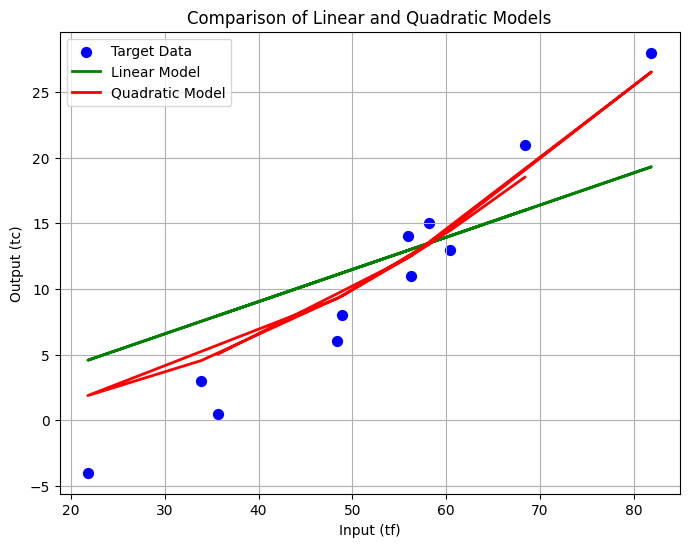

In [ ]:
print("\nLinear Model:")
linearParams = [torch.tensor(1.0, requires_grad=True), torch.tensor(1.0, requires_grad=True)]
linearModel = HW5Problem1Model("linear")
trainedLinearParams = linearModel.train(5000, 0.001, linearParams, tf, tc)
print("Trained parameters:", [p.item() for p in trainedLinearParams])

print("\nQuad Model:")
quadParams = [torch.tensor(1.0, requires_grad=True), torch.tensor(1.0, requires_grad=True), torch.tensor(1.0, requires_grad=True)]
quadModel = HW5Problem1Model("quad")
trainedQuadParams = quadModel.train(5000, 0.001, quadParams, tf, tc)
print("Trained parameters:", [p.item() for p in trainedQuadParams])

quadModel.plotComparison(tf, tc, trainedLinearParams, trainedQuadParams)

In [ ]:
class LinearRegression:
    def __init__(self, learningRate=0.01):
        self.learningRate = learningRate
        self.weights = None
        self.bias = None

    def initializeParameters(self, nFeatures):
        self.weights = np.zeros(nFeatures)
        self.bias = 0

    def forward(self, X):
        return np.dot(X, self.weights) + self.bias

    def computeLoss(self, yPred, yTrue):
        return np.mean((yPred - yTrue) ** 2)

    def backward(self, X, yTrue, yPred):
        m = len(yTrue)
        dw = (2/m) * np.dot(X.T, (yPred - yTrue))
        db = (2/m) * np.sum(yPred - yTrue)
        return dw, db

    def train(self, xTrain, yTrain, xVal, yVal, epochs=5000, printEvery=500):
        self.initializeParameters(xTrain.shape[1])
        history = {'trainLoss': [], 'valLoss': [], 'epochs': []}

        for epoch in range(epochs):
            yPredTrain = self.forward(xTrain)
            trainLoss = self.computeLoss(yPredTrain, yTrain)

            yPredVal = self.forward(xVal)
            valLoss = self.computeLoss(yPredVal, yVal)

            dw, db = self.backward(xTrain, yTrain, yPredTrain)

            self.weights -= self.learningRate * dw
            self.bias -= self.learningRate * db

            if (epoch + 1) % printEvery == 0:
                history['trainLoss'].append(trainLoss)
                history['valLoss'].append(valLoss)
                history['epochs'].append(epoch + 1)
                print(f"Epoch {epoch + 1} Training Loss: {trainLoss:.4f} Validation Loss: {valLoss:.4f}")

        return history

def prepareData(data, features):
    X = data[features].values
    y = data['price'].values

    xTrain, xVal, yTrain, yVal = train_test_split(X, y, test_size=0.2, random_state=42)

    featureScaler = StandardScaler()
    xTrainScaled = featureScaler.fit_transform(xTrain)
    xValScaled = featureScaler.transform(xVal)

    targetScaler = StandardScaler()
    yTrainScaled = targetScaler.fit_transform(yTrain.reshape(-1, 1)).ravel()
    yValScaled = targetScaler.transform(yVal.reshape(-1, 1)).ravel()

    return xTrainScaled, xValScaled, yTrainScaled, yValScaled, featureScaler, targetScaler

def plotLearningCurves(histories, learningRates):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    for history, lr in zip(histories, learningRates):
        plt.plot(history['epochs'], history['trainLoss'], label=f'LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.title('Training Loss vs Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    for history, lr in zip(histories, learningRates):
        plt.plot(history['epochs'], history['valLoss'], label=f'LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.title('Validation Loss vs Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

Training models with selected features:

Training with learning rate: 0.2
Epoch 500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 1000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 1500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 2000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 2500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 3000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 3500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 4000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 4500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 5000 Training Loss: 0.4378 Validation Loss: 0.7436

Training with learning rate: 0.1
Epoch 500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 1000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 1500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 2000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 2500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 3000 Training Loss: 0.4378 Valida

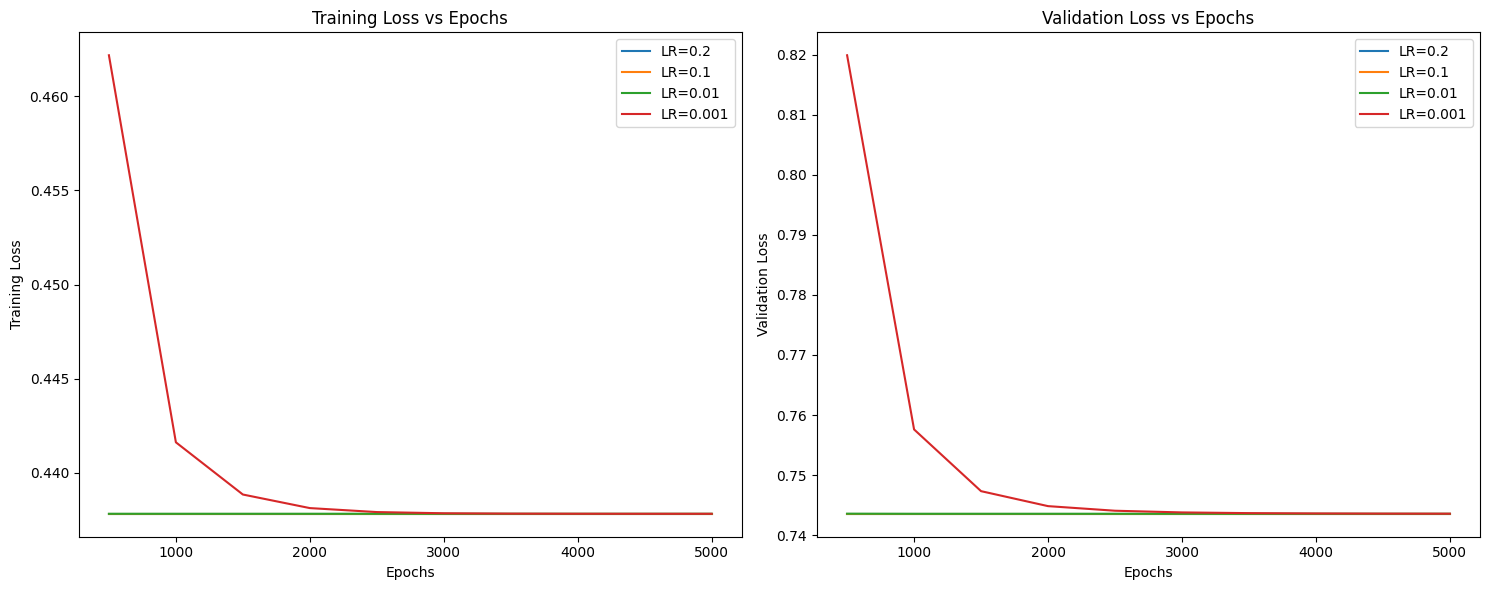

In [ ]:
url = "https://raw.githubusercontent.com/Mand187/Intro-to-ML/refs/heads/master/Data/Housing.csv"
housingData = pd.read_csv(url)

selectedFeatures = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
allFeatures = housingData.select_dtypes(include=[np.number]).columns.tolist()
allFeatures.remove('price')

learningRates = [0.2,0.1,0.01,0.001]
print("Training models with selected features:")
xTrainScaled, xValScaled, yTrainScaled, yValScaled, featureScaler, targetScaler = prepareData(housingData, selectedFeatures)

historiesSelected = []
for lr in learningRates:
    print(f"\nTraining with learning rate: {lr}")
    model = LinearRegression(learningRate=lr)
    history = model.train(xTrainScaled, yTrainScaled, xValScaled, yValScaled)
    historiesSelected.append(history)

plotLearningCurves(historiesSelected, learningRates)


Training models with all features:

Training with learning rate: 0.2
Epoch 500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 1000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 1500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 2000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 2500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 3000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 3500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 4000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 4500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 5000 Training Loss: 0.4378 Validation Loss: 0.7436

Training with learning rate: 0.1
Epoch 500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 1000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 1500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 2000 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 2500 Training Loss: 0.4378 Validation Loss: 0.7436
Epoch 3000 Training Loss: 0.4378 Validation

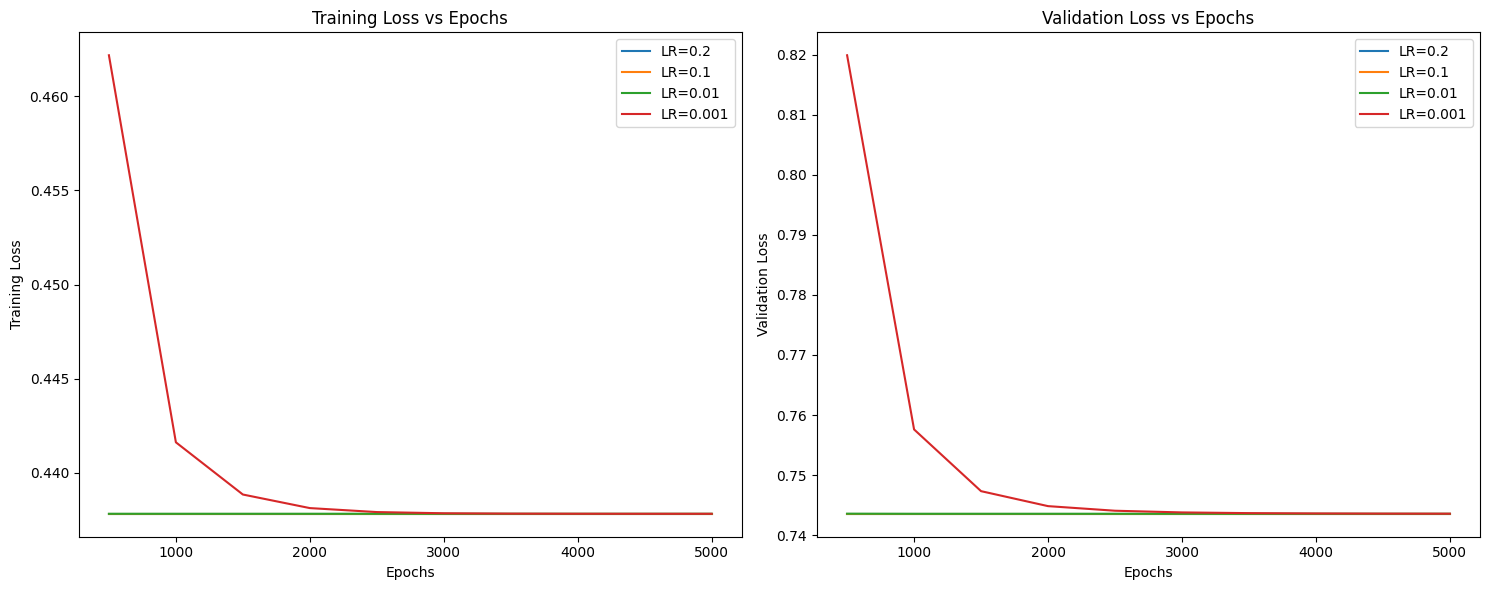

In [ ]:
print("\nTraining models with all features:")
xTrainScaledAll, xValScaledAll, yTrainScaledAll, yValScaledAll, featureScalerAll, targetScalerAll = prepareData(housingData, allFeatures)

historiesAll = []
for lr in learningRates:
    print(f"\nTraining with learning rate: {lr}")
    model = LinearRegression(learningRate=lr)
    history = model.train(xTrainScaledAll, yTrainScaledAll, xValScaledAll, yValScaledAll)
    historiesAll.append(history)

plotLearningCurves(historiesAll, learningRates)